# Weighted Linear Fit

*June 9, 2021*

In this notebook we will fit a linear function to a set of experimental data.  The fit will be weighted by the measurement uncertainties.

Updated by Jordan Andrews on June 9, 2021 with the use of np.polynomial.Polynomial([a, b, c]).

In this example, our data will be the voltage across and the current through a resistor.  The slope of our data will tell us the resistance of the resistor.  First import the *NumPy* module.

In [72]:
import numpy as np

Enter the data as arrays.

In [73]:
Irms= np.array([0.00907, 0.00794, 0.00642, 0.00472, 0.00296, 0.001911, 0.000467, 0.0000469])
errIrms= np.array([1.9e-4, 1.8e-4, 1.6e-4, 1.5e-4, 1.3e-4, 1e-4, 5e-5, 1e-5])
Vp2p = np.array([5.62, 4.94, 4.02, 2.96, 1.86, 1.19, 0.302, 0.047])
errVp2p = np.array([0.04, 0.04, 0.04, 0.04, 0.04, 0.03, 0.01, 0.008])

When the data was collected the current was measured as rms values, convert the peak-to-peak voltage measurements to rms by dividing by $2\sqrt{2}$.

In [74]:
Vrms = Vp2p/(2*np.sqrt(2))
errVrms = errVp2p/(2*np.sqrt(2))

Notice that the current data has larger relative errors than the voltage data (typically by a factor of two or more):

In [75]:
Irel = errIrms/Irms
Vrel = errVrms/Vrms
Irel/Vrel

array([2.9432194 , 2.79974811, 2.5046729 , 2.35169492, 2.04222973,
       2.07570208, 3.23340471, 1.25266525])

 Because the relative error in current is larger, we will plot the data as current vs voltage and show the error bars only along the y-axis.  Use plt.errorbar(x,y,e) from the *Matplotlib* module.

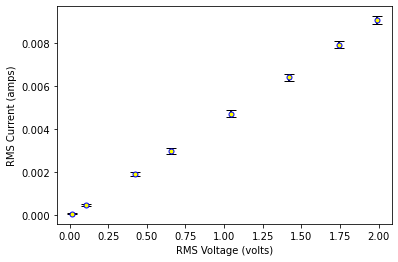

In [76]:
import matplotlib.pyplot as plt
plt.errorbar(Vrms, Irms, errIrms, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                markeredgecolor = 'b',\
                markerfacecolor = 'yellow',\
                capsize = 5)
plt.xlabel('RMS Voltage (volts)')
plt.ylabel('RMS Current (amps)');

To do the actual fit, we will use the 'curve_fit()' function from, the *SciPy* module.  This way of fitting is very nice because we will be able to use it for all types of fit models (linear, polynomial, linear-in-parameter fits, and nonlinear fits).  As we will see, it is capable of doing both unweighted and weighted fits and it will return uncertainties in the fit parameters.

In [77]:
from scipy.optimize import curve_fit

The first step is to define a function for the model that we will fit our data to.  In this case, the model is just the equation of a staight a line.

In [78]:
def linearFunc(x, intercept, slope):
    y = slope*x + intercept
    return y

Here is the actual command to execute the fit.  At a minimum, *curve_fit()* requires as inputs the function that defines the model, the $x$-data, and the $y$-data.  The statement below tells *curve_fit()* to return a list of the the best-fit parameters (a_fit) and the covariance matrix (cov) which will be used to determine the error in the fit parameters.

In [79]:
a_fit, cov = curve_fit(linearFunc, Vrms, Irms)

Here are the contents of a_fit and cov.

In [80]:
print('The best-fit parameters are: (1) slope =', a_fit[1], 'and (2) intercept',\
      a_fit[0])
print('Here is the covariance matrix:\n', cov)

The best-fit parameters are: (1) slope = 0.004562609977167653 and (2) intercept -3.029377062510313e-05
Here is the covariance matrix:
 [[ 2.10867163e-10 -1.45419351e-10]
 [-1.45419351e-10  1.57145259e-10]]


As we will see in PHYS 232, the uncertainties of the best-fit parameters are determined from the square roots of the diagonal elements of the covariance matrix.  We can select the diagonal elements using:

In [81]:
print(np.diag(cov))
print('The error in the slope is:', np.sqrt(np.diag(cov))[1], '\n'
      'The error in the intercept is:', np.sqrt(np.diag(cov))[0])

[2.10867163e-10 1.57145259e-10]
The error in the slope is: 1.2535759226262432e-05 
The error in the intercept is: 1.4521265884900987e-05


*NumPy*  has a nice package for polynomials, called *polynomial*. There are six different polynomial types in this package. For our case, we are dealing with a simple power series. You can use the*Polynomial* constructor for this. y = np.polynomial.Polynomial([a, b, c]) results in $y = a + b\,x + c\,x^2$.  

Here's the best-fit fucntion obtained using *a_fit* from *curve_fit()* and the built in polynomial package of *NumPy*.

In [82]:
fitFcn = np.polynomial.Polynomial(a_fit)
fitFcn

Polynomial([-3.02937706e-05,  4.56260998e-03], domain=[-1,  1], window=[-1,  1])

We can then evaluate *fitFcn(x)* at any value of $x$ that we want.

In [83]:
fitFcn(0), fitFcn(1)

(-3.029377062510313e-05, 0.004532316206542549)

This gives us an easy way to plot the fit on top of the data.

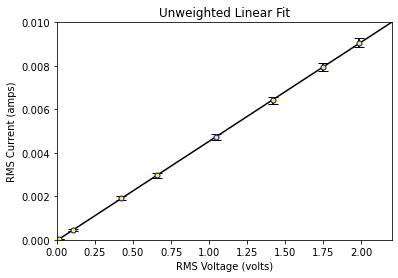

In [84]:
# Create a range of $x$ values for plotting:
xx = np.arange(-1, 10, 0.1)

# Plot of the data as we did above...
plt.errorbar(Vrms, Irms, errIrms, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                markeredgecolor = 'b',\
                markerfacecolor = 'yellow',\
                capsize = 5)

# Plot the best-fit line...
plt.plot(xx, fitFcn(xx), 'k-')

# Add some plot labels...
plt.xlabel('RMS Voltage (volts)')
plt.ylabel('RMS Current (amps)')
plt.title('Unweighted Linear Fit')

# Set the range of the axes...
plt.axis((0, 2.2, 0, 0.01));

All of this has produced an "unweighted" fit to the data.  To include weights, all we need to do is include another option in *curve_fit()*.  Everything else is exactly the same!  The new option is *sigma* and it is simply a list of the errors in the $y$-values.  Note that many fitting routines require you to provide the actual weights as $1/\sigma^2$.  That is not the case here.  You just have to provide the absolute $y$-uncertainties.

In [85]:
a_fit, cov = curve_fit(linearFunc, Vrms, Irms, sigma = errIrms)

Extract the fit parameters and their uncertainties.

In [86]:
print('The best-fit parameters are: (1) slope =', a_fit[1], 'and (2) intercept',\
      a_fit[0])
print('The error in the slope is:', np.sqrt(np.diag(cov))[1], '\n'
      'The error in the intercept is:', np.sqrt(np.diag(cov))[0])

The best-fit parameters are: (1) slope = 0.004560548503316531 and (2) intercept -2.8519759527912626e-05
The error in the slope is: 9.344743968455787e-06 
The error in the intercept is: 1.7648857220463362e-06


Get the best-fit line.

In [87]:
fitFcn = np.polynomial.Polynomial(a_fit)
fitFcn

Polynomial([-2.85197595e-05,  4.56054850e-03], domain=[-1,  1], window=[-1,  1])

Plot the data...

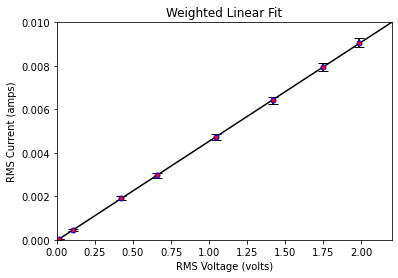

In [88]:
plt.errorbar(Vrms, Irms, errIrms, fmt = 'ko', markersize = 5,\
                 linewidth = 1.8,\
                markeredgecolor = 'b',\
                markerfacecolor = 'r',\
                capsize = 5)

# Plot the best-fit line...
xx = np.arange(-1, 10, 0.1)
plt.plot(xx, fitFcn(xx), 'k-')

# Do some formatting...
plt.xlabel('RMS Voltage (volts)')
plt.ylabel('RMS Current (amps)')
plt.title('Weighted Linear Fit')
plt.axis((0, 2.2, 0, 0.01));

Save the plot as a pdf.

In [89]:
plt.savefig('Weighted linear fit plot.pdf', format='pdf')

<Figure size 432x288 with 0 Axes>